<a href="https://colab.research.google.com/github/JohanA1809/Analisis-Titanic/blob/main/data_analysis_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#Lectura de datos
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [3]:
#Verificación de porcentaje de datos nulos
(titanic.isnull().sum()/len(titanic))*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
#Renombrar la columna class a clase y fare a tarifa
titanic.rename(columns={'class':'clase'}, inplace=True)
titanic.rename(columns={'fare':'tarifa'}, inplace=True)

In [8]:
#Muestra los valores distintos para class (clase):
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

In [5]:
#Observamos las primeras 5 filas
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False


In [9]:
#Añadimos nuevas columnas: is_old , is_baby
def is_old_func(row):
  return row['age']>60
titanic['is_old'] = titanic.apply(is_old_func,axis='columns')
titanic.eval('is_baby = age<15', inplace=True)

In [10]:
#Definir una variable numérica: class_num
def class_num_func(row):
  Clase={'Third':3, 'First':1,'Second':2}
  return Clase[row.clase]
titanic['class_num']=titanic.apply(class_num_func,axis='columns')

In [11]:
#Observamos las 5 primeras filas
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [12]:
#Consulta con condiciones
titanic[
    (titanic.sex=='female')
    & (titanic['clase'].isin(['First','Third']))
    & (titanic.age > 45)
    & (titanic.survived==0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


<Axes: xlabel='pclass', ylabel='count'>

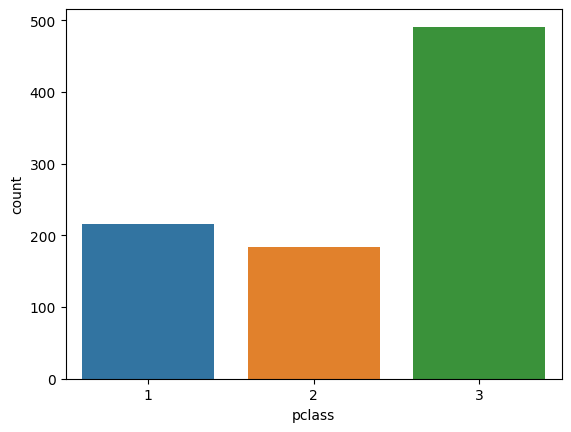

In [13]:
#Distribución de las clases
sns.countplot(x="pclass", data=titanic)

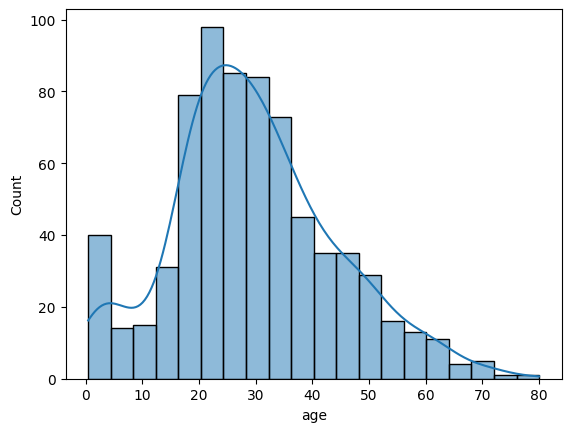

In [14]:
#Distribución de la edad
sns.histplot(titanic.age.dropna( ),
kde=True)
plt.show()

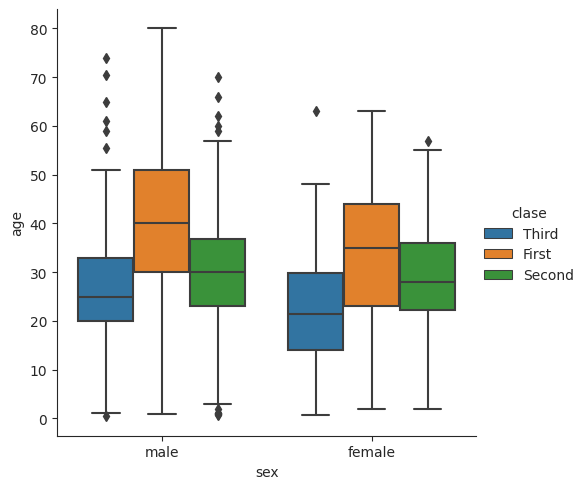

In [15]:
#BoxPlot de la edad por sexo y clase
with sns.axes_style(style='ticks'):
  ax=sns.catplot(data=titanic, x="sex",y="age", hue="clase", kind="box")

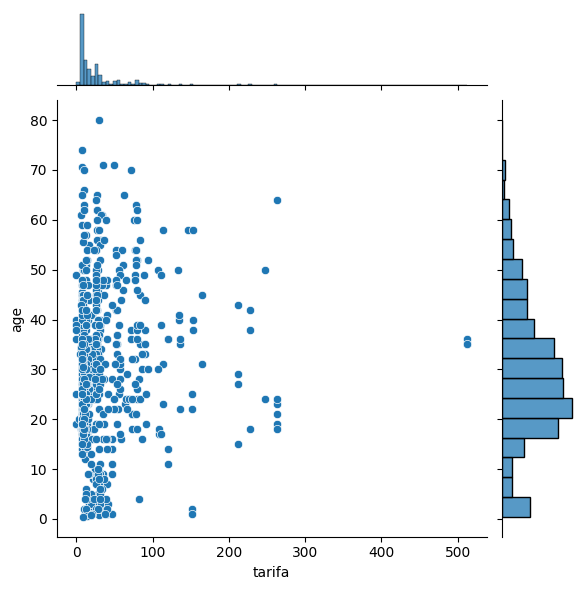

In [16]:
#Distribución cruzadad de edad y tarifa
sns.jointplot(x='tarifa',y='age',data=titanic)

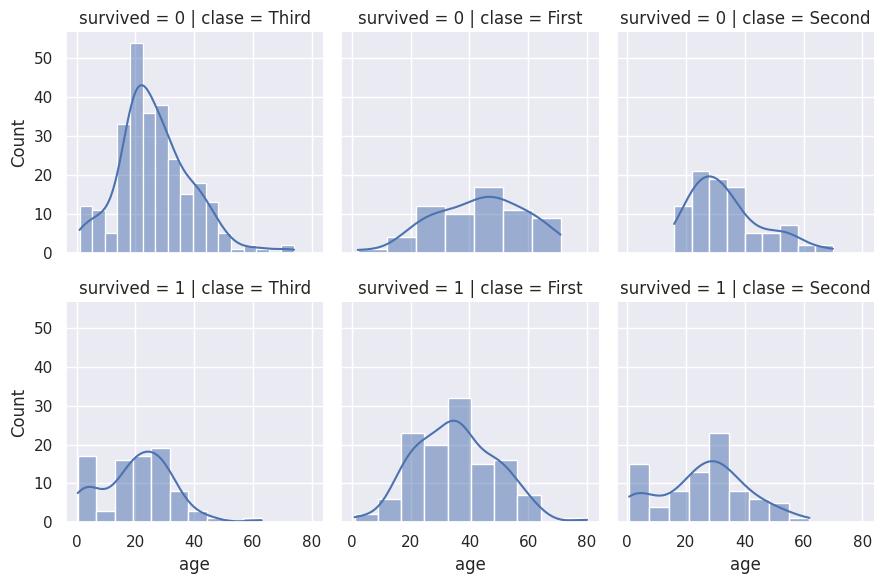

In [17]:
#Cambiamos el font y construimos una matriz de gráficos
sns.set(font_scale=1)

#FacetGrid
g= sns.FacetGrid(titanic,row='survived',col='clase')
g.map(sns.histplot,"age",kde=True)
plt.show()

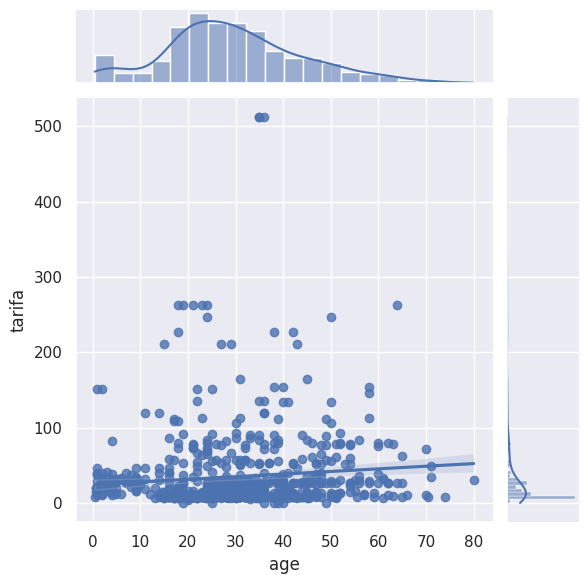

In [18]:
#Se realiza un diagrama de dispersión con distribución de cada variable fare(precio)/age(edad)
sns.jointplot(data=titanic,x='age',y='tarifa',kind='reg',color='b')
plt.show()


<ipython-input-19-9ea6ebf859c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc= titanic.corr()


Text(0.5, 1.0, 'titanic.corr()')

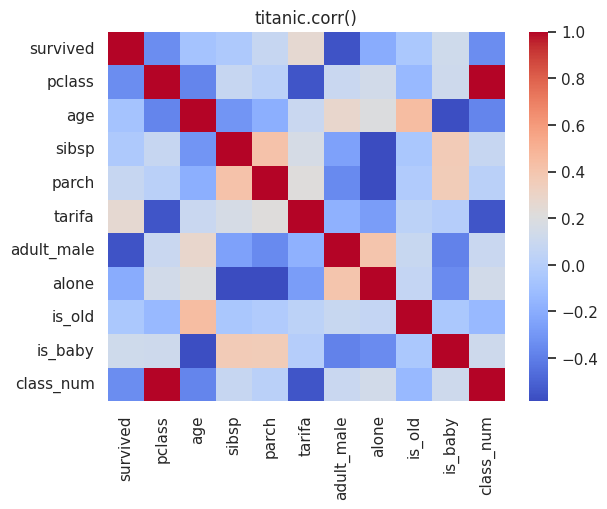

In [19]:
#Se realiza mapa de color de correlaciones
tc= titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')